## Optimal building level

Through this notebook we will look for the optimal building level according to our assumptions.

It may be required to get some information as: 

- Cumulative building levels $Bl$ : Sum of levels of each building in the game
- Retail price $Rp$ : price at which the product you're about to produce will be sold at 
- Total Inputs price $In$ : sum of the units*prices required to produce the product
- Factory wages $Fw$ : The cost of running the factory per hour, per level (No admin overhead assumed yet). It used to be given by the game, today we have to calculate it by ourselves as $Fw = Pw * Pu$ (each of the variables are described next)
- Produced units $Pu$ : Amount of units produced in one hour in a lvl1 building. 
- Product wages $Pw$ : Even though the actual model requires the Factory Wages, we can skip the manual calculation, so we express the previous formula $Fw = Pw * Pu$ in our code, requiring the variable $Pw$
- Productivity bonus $Pb$ : '%' of extra production (it could have been gotten by stars, parks and recreation buildings, or robots) 
- Executives skill bonus $Sk$ : Cumulative skill of the executives $Sk = COO + \frac{CMO + CFO + CTO}{4}$

The expected profit $P$ is given by the function: 

$$ P = \big{[} Rp - In - \big{(}\frac{Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} Bl $$

$$ P = \big{[} Bl Rp - Bl In - Bl \big{(}\frac{Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} $$

$$ P = \big{[} Bl Rp - Bl In - \big{(}\frac{Bl^2 (1-Sk)}{170}+Bl \big{)} \frac{Pw}{(1 + Pb)} \big{]} $$

Note:

The daily profit could be gotten by multiplying the profit times $24* Pu$

Therefore; The daily Profit stands as:

$$ P_d = \big{[} Rp - In - \big{(}\frac{Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} Bl* 24* Pu $$


The 'optimal' building level is given when:

$$ \frac{\partial P}{\partial Bl} = 0$$

$$ \frac{\partial P}{\partial Bl} = \big{[} Rp - In - \big{(}\frac{2 Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} = 0 $$

Solving for $Bl$: 

$$ Bl^* = \big{(} (Rp - In) \frac{(1+Pb)}{Pw} - 1 \big{)} \frac{170}{2 (1-Sk)} $$

### Building costs

Additional to the Optimal profit, there is another variable; the cost of upgrading at a certain building level.

The costs for upgrading a building ($Cb$) are given the following way:
  
if $C$ is the cost of upgrading a lvl 1 building, then every upgrade can be expressed as:

- Lvl 1: C
- Lvl 2: C
- Lvl 3: 2C
- Lvl 4: 3C
- Lvl 5: 4C
- ... 

Then the building cost of 1 slot until level "$Lvl$" could be expressed as $1+\frac{1+(Lvl-1)}{2}(Lvl-1))$

Since we pretend to build the total amount of buildings evenly (more efficient), then the total Building Costs $Tc$ can be aproximated as a function of the total building levels $Bl$ (as defined previously), the building slots $Sl$, and the unitary costs of upgrading $C$ (since this formula requires discrete numbers it is only exact when the ratio between $Bl$ and $Sl$ is an integer, otherwise it is just an approximation):

$Tc = \big{[}1+\frac{1+(\frac{Bl}{Sl}-1)}{2}(\frac{Bl}{Sl}-1)) \big{]} C Sl $


### Numerical approximations

For this exercise we are assuming the production of rocket engines. and therefore comparing between the use of robots or the absense of them. 

- $Pu = 0.29$
- $Pw = 2050$
- $Rp = 10900$
- $In = 9950 - 2650 = 7300$
- $Pb = 0.04$ or $0.07$ with robots
- $Sk = 0.30$
- $Bl = ?$ 

So we are playing with the building level as the main variable 

In [25]:
reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
# %matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

from mpl_interactions import ipyplot as iplt

def P(Bl, Rp, In, Pu, Pb, Pw, Sk):
    # Profit
    W = (Bl*(1-Sk)/170 +1)*Pw/(1+Pb)
    P = (Rp - In - W) * Bl
    return  P * 24 * Pu# To find daily profit

def An_Bl(Rp, In, Pu, Pb, Pw, Sk):
    # Analytical estimation for the building level
    return ((Rp - In)*(1+Pb)/Pw -1)*170/2/(1-Sk)

def Num_Bl(Rp, In, Pu, Pb, Pw, Sk):
    # Numerical estimation for the building level 
    def neg_p(*args):
        return -P(*args)
    return opt.minimize(neg_p,x0=80,args=(Rp, In, Pu, Pb, Pw, Sk)).x[0] # Numerical Optimization

def P_star(Rp, In, Pu, Pb, Pw, Sk):
    # Optimal Profit
    # P(Bl(Rp, In, Pu, Pb, Fw, Sk),Rp, In, Pu, Pb, Fw, Sk) equivalent:
#     return (P(Num_Bl(Rp, In, Pu, Pb, Pw, Sk), Rp, In, Pu, Pb, Pw, Sk))
    return (P(An_Bl(Rp, In, Pu, Pb, Pw, Sk), Rp, In, Pu, Pb, Pw, Sk))


def BuildingCost(Bl, Sl, C):
    #Building costs
    sing = lambda x: 1+((1+(x-1))/2*(x-1)) #For one simple building at lvl; x
    return sing(Bl/Sl)*C*Sl #For many buildings at lvl; Bl/Sl

def OptimalBuildingCosts(Bl_star, *args):
    return BuildingCost(Bl_star, *args)

In [27]:
# Optimal solution with no robots: 

Pu = 0.3
Pb = 0.04 # No robots
Pw = 2050
Rp = 10600
In = 9954-2050-728
Sk = 0.3

slots = 13
UnitaryBuildingCost = 105000

print("Optimal Building Level: {}".format(Num_Bl(Rp, In, Pu, Pb, Pw, Sk)))
print("Profit at optimal building level: {}".format(P_star(Rp, In, Pu, Pb, Pw, Sk)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(An_Bl(Rp, In, Pu, Pb, Pw, Sk), slots, UnitaryBuildingCost)))

Optimal Building Level: 89.49939560071662
Profit at optimal building level: 468103.7504754756
Building costs of optimal building level: 29014916.08976866


In [45]:
# Numerical estimation of the Building level
Num_Bl(Rp, In, Pu, Pb, Pw, Sk)

89.49939560071662

In [46]:
# Analytical estimation of the Building level
An_Bl(Rp, In, Pu, Pb, Pw, Sk)

89.49937282229966

In [47]:
# Same scenario, but with robots

Pb = 0.07 # Robots

print("Optimal Building Level: {}".format(An_Bl(Rp, In, Pu, Pb, Pw, Sk)))
print("Profit at optimal building level: {}".format(P_star(Rp, In, Pu, Pb, Pw, Sk)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(An_Bl(Rp, In, Pu, Pb, Pw, Sk), slots, UnitaryBuildingCost)))

Optimal Building Level: 95.58383275261325
Profit at optimal building level: 518944.10210322717
Building costs of optimal building level: 33243320.079962872


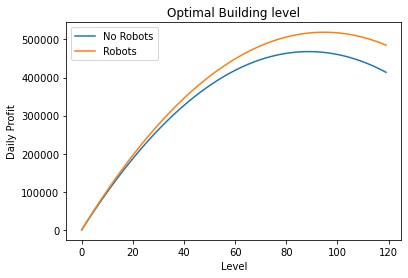

In [48]:
Bls =np.linspace(0,120,120)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Rp=Rp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Rp, In, Pu, 0.04, Pw, Sk), label = 'No Robots')
plt.plot(P(Bls, Rp, In, Pu, 0.07, Pw, Sk), label = 'Robots')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();

### Multi-Step process

For the multi-step scenario the same formulas are used with a slight modification. This modification though, requires a lot of attention for the manual entry of the data.

The process starts in a similar way as the previous case scenario. This time, for simplicity, we are representing the Profit as 3 different parts: 

- Retail price $Rp$ (at which we are selling our product)
- Total Input Resources $In_{T}$ (As the not produced resources for any of the resources produced in the full process)
- Total Wages $W_{T}$ (As the total amount paid in wages in the full process) 

Next we have the Building level $Bl$, but this time we will need to add an additional multiplier parameter $$ in representation of the building units required to produced a single unit of the final product.

So the profit may be defined as:

$$ P = [Rp - In_T - W_T] Bl$$

Where the Total Wages are defined as: 

$$W_T = \sum_{i=1}^{n} R_i W_i =  \big{(} \frac{ Bl (1-Sk)}{170}-1 \big{)} \frac{1}{(1+Pb)} \sum_{i=1}^{n} R_i Pw_i $$

where $R_i$ is the requiered amount of each resource for the end product.(if it's the end product, $R_i = 1$)

Lets say $\sum_{i=1}^{n} R_i Pw_i$ is equivalent to the 'Total product wages', and let it be equal to $Pw_T$

Then we can express $W_T$ as: 

$$W_T = \big{(} \frac{ Bl (1-Sk)}{170}-1 \big{)} \frac{Pw_T }{(1+Pb)} $$

Evaluating the Total wages expression into our profit

$$ P = [Rp - In_T - \big{(} \frac{ Bl (1-Sk)}{170}-1 \big{)} \frac{Pw_T }{(1+Pb)}] Bl$$

$$ P = \big{[} Bl Rp - Bl In - Bl \big{(}\frac{ Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} $$

$$ P = \big{[} Bl Rp - Bl In - \big{(}\frac{ Bl^2 (1-Sk)}{170}+ Bl \big{)} \frac{Pw}{(1 + Pb)} \big{]} $$

Note: In order to get the daily profit we must multiply the Profit $P$ by $24Pu$ where $Pu$ is the amount of units produced of our finished product and not the intermediate ones. (For this calculations, we will define a variable $\alpha$)

The 'optimal' building level is given when:

$$ \frac{\partial P}{\partial Bl} = 0$$

$$ \frac{\partial P}{\partial Bl} = \big{[} Rp - In - \big{(}\frac{2  Bl (1-Sk)}{170}+1 \big{)} \frac{Pw}{(1 + Pb)} \big{]} = 0 $$

Solving for $Bl$: 

$$ Bl^* = \big{(} (Rp - In) \frac{(1+Pb)}{Pw} - 1 \big{)} \frac{170}{2  (1-Sk)} $$

This model is the same as the single step solution plus some extra letters. It just adds some intermediate manual steps for the calculation of $In_T$, $Pw_T$, and $\alpha$ as the proportion of building per resource required.

### Numerical approximations
Lets consider we are building BFRs 

The input resources for each of the steps are: 
- BFR: 1 Orbital Booster + 1 Starship
- Orbital Booster: 40 fuselage + 16 propellant tanks + 34 Rocket engines
- Starship: 2 Cockpit + 10 Heat shield + 4 Attitude controller + 6 propellant tanks + 7 Rocket engines
- Rocket engines: 20 Steel + 8 HGEC + 10 Aluminium

But, since we are producing some dependencies, we may not consider them into our Total inputs variable.  
our total input resources is then stated as:

$In_T =$ 1 Orbital Booster + 1 Starship

$In_T =$ 1*(40 fuselage + 16 propellant tanks + 34 Rocket engines) + 1*(2 Cockpit + 10 Heat shield + 4 Attitude controller + 6 propellant tanks + 7 Rocket engines)

$In_T =$ 1*(40 fuselage + 16 propellant tanks + 34 * (20 Steel + 8 HGEC + 10 Aluminium)) + 1*(2 Cockpit + 10 Heat shield + 4 Attitude controller + 6 propellant tanks + 7 * (20 Steel + 8 HGEC + 10 Aluminium))

$In_T \approx 1*(40*2750 + 16* 9350 + 34*(20*10.7 + 8* 880 + 10*18.8)) + 1*(2*5100 + 10*515 + 4*4780 + 6*9350 + 7*(20*10.7 + 8* 880 + 10*18.8)) \approx 512628 + 142664 \approx 655292 $

In the same way, our Wages can be defined as the sum of the wages of the individual wages

$W_T = W_{HGEC} + W_{RE} = \big{(} \frac{ Bl (1-Sk)}{170}-1 \big{)} \frac{1}{(1+Pb)} \big{(} BFR*Pw_{BFR} +OB*Pw_{OB} + Star*Pw_{Star} + RE*Pw_{RE} \big{)}$

So the total Product Wages $Pw_T$ is equal to:

$Pw_T = \sum_{i=1}^{n} Pw_i = BFR*Pw_{BFR} +OB*Pw_{OB} + Star*Pw_{Star} + RE*Pw_{RE} $ 

$Pw_T = 1*3600 + 1*390 + 1*1950 + (34+7)*2220 = 96960$

And we have all the information but the building ratio $\alpha$
For the calculation of this ratio we need to know the amount of buildings required for the production fo a single unit of the end product (RE) 

### $\alpha $ estimation

The procedure for the estimation of alpha is to calculate the amount of buildings required to produce one unit of the end product in one hour. 

We need to produce:
$$ BFR = 1 OB_{BFR} + 1 Star_{BFR} + 34 RE_{OB_{BFR}} + 7 RE_{Star_{BFR}} $$

Therefore, our alpha can be calculated as: 
$$ \alpha_T = \frac{1}{Pu_{BFR}} + \frac{OB}{Pu_{OB}}  + \frac{Star}{Pu_{Star}} + \frac{OB * RE}{Pu_{RE}}  + \frac{Star * RE}{Pu_{RE}}$$ 

$$ \alpha_T = \frac{1}{Pu_{BFR}} + \frac{1}{Pu_{OB}}  + \frac{1}{Pu_{Star}} + \frac{34}{Pu_{RE}}  + \frac{7}{Pu_{RE}}$$ 

$$ \alpha_T \approx 155.19$$

$$ \alpha_{BFR} = \frac{1}{Pu_{BFR}} * \frac{1}{\alpha_T} \approx \frac{4.76}{155.19} \approx 0.0307$$
$$ \alpha_{OB} = \frac{OB}{Pu_{OB}} * \frac{1}{\alpha_T} \approx \frac{0.6666}{155.19} \approx 0.0043$$
$$ \alpha_{Star} = \frac{Star}{Pu_{Star}} * \frac{1}{\alpha_T} \approx \frac{3.333}{155.19} \approx 0.0215$$
$$ \alpha_{RE} = \big{(} \frac{OB * RE}{Pu_{RE}}  + \frac{Star * RE}{Pu_{RE}} \big{)}* \frac{1}{\alpha_T} \approx \frac{121.42}{155.19} + \frac{25}{155.19}\approx 0.7824 + 0.1611 \approx 0.9435$$

So, most of our efforts should be to produce Rocket engines at the cheapest price possible. 

Consider that between each step there's a gap in profit, where we buy low quality input resources and we transform them into high quality output resources which are sold more expensive (Let's say we buy q2 $HGEC$, produce q3 $RE$, produce q4 $OB$ and $Star$, and lastly produce q5 $BFR$.

The process isn't cheap though. It requires a lot of money in investigation for the high quality products. 

In [3]:
# %matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

# from mpl_interactions import ipyplot as iplt

def P(Bl, Rp, In, Pu, Pb, Pw, Sk):
    # Profit
    W = (Bl*(1-Sk)/170 +1)*Pw/(1+Pb)
    P = (Rp - In - W) * Bl
    return  P * 24 * Pu # To find daily profit

def An_Bl(Rp, In, Pu, Pb, Pw, Sk):
    # Analytical estimation for the building level
    return ((Rp - In)*(1+Pb)/Pw -1)*170/2/(1-Sk)

def Num_Bl(Rp, In, Pu, Pb, Pw, Sk):
    # Numerical estimation for the building level 
    def neg_p(*args):
        return -P(*args)
    return opt.minimize(neg_p,x0=80,args=(Rp, In, Pu, Pb, Pw, Sk)).x[0] # Numerical Optimization

def P_star(Rp, In, Pu, Pb, Pw, Sk):
    # Optimal Profit
    # P(Bl(Rp, In, Pu, Pb, Fw, Sk),Rp, In, Pu, Pb, Fw, Sk) equivalent:
#     return (P(Num_Bl(Rp, In, Pu, Pb, Pw, Sk), Rp, In, Pu, Pb, Pw, Sk))
    return (P(An_Bl(Rp, In, Pu, Pb, Pw, Sk), Rp, In, Pu, Pb, Pw, Sk))


def BuildingCost(Bl, Sl, C):
    #Building costs
    sing = lambda x: 1+((1+(x-1))/2*(x-1)) #For one simple building at lvl; x
    return sing(Bl/Sl)*C*Sl #For many buildings at lvl; Bl/Sl

def OptimalBuildingCosts(Bl_star, *args):
    return BuildingCost(Bl_star, *args)

In [6]:
# Multi-step Building optimization 

Rp = 780000 # Of the final product
In = 627989
Pw = 96960 
Pu = 0.0307 # alpha of the end product 

Pb = 0.04 # No robots
Sk = 0.3

slots = 13
UnitaryBuildingCost = 105000

print("Optimal Building Level: {}".format(Num_Bl(Rp, In, Pu, Pb, Pw, Sk)))
print("Profit at optimal building level: {}".format(P_star(Rp, In, Pu, Pb, Pw, Sk)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(An_Bl(Rp, In, Pu, Pb, Pw, Sk), slots, UnitaryBuildingCost)))

Optimal Building Level: 76.55835679249073
Profit at optimal building level: 1657844.5779019326
Building costs of optimal building level: 21015874.40263224


In [7]:
Pb = 0.07 # Robots
print("Optimal Building Level: {}".format(Num_Bl(Rp, In, Pu, Pb, Pw, Sk)))
print("Profit at optimal building level: {}".format(P_star(Rp, In, Pu, Pb, Pw, Sk)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(An_Bl(Rp, In, Pu, Pb, Pw, Sk), slots, UnitaryBuildingCost)))

Optimal Building Level: 82.2695702863833
Profit at optimal building level: 1860741.526827851
Building costs of optimal building level: 24379296.468998887


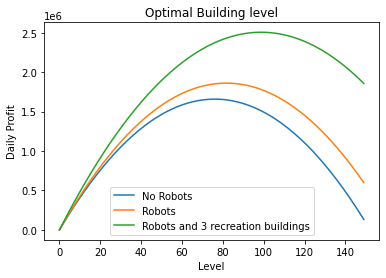

In [9]:
Bls =np.linspace(0,150,150)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Rp=Rp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Rp, In, Pu, 0.04, Pw, Sk), label = 'No Robots')
plt.plot(P(Bls, Rp, In, Pu, 0.07, Pw, Sk), label = 'Robots')
plt.plot(P(Bls, Rp, In, Pu, 0.16, Pw, Sk), label = 'Robots and 3 recreation buildings')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();

##### Just another simulation

In [10]:
# Multi-step Building optimization 

Rp = 800000 # Of the final product
In = 627989
Pw = 96960 

Pu = 0.0307 # alpha of the end product

Pb = 0.04 # No robots
Sk = 0.3

slots = 13
UnitaryBuildingCost = 105000

print("Optimal Building Level: {}".format(Num_Bl(Rp, In, Pu, Pb, Pw, Sk)))
print("Profit at optimal building level: {}".format(P_star(Rp, In, Pu, Pb, Pw, Sk)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(An_Bl(Rp, In, Pu, Pb, Pw, Sk), slots, UnitaryBuildingCost)))

Optimal Building Level: 102.60723290957071
Profit at optimal building level: 2977938.58553984
Building costs of optimal building level: 38496193.13597304


In [11]:
Pb = 0.07 # Robots
print("Optimal Building Level: {}".format(Num_Bl(Rp, In, Pu, Pb, Pw, Sk)))
print("Profit at optimal building level: {}".format(P_star(Rp, In, Pu, Pb, Pw, Sk)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(An_Bl(Rp, In, Pu, Pb, Pw, Sk), slots, UnitaryBuildingCost)))

Optimal Building Level: 109.07017608248702
Profit at optimal building level: 3270531.652817952
Building costs of optimal building level: 43681450.46055252


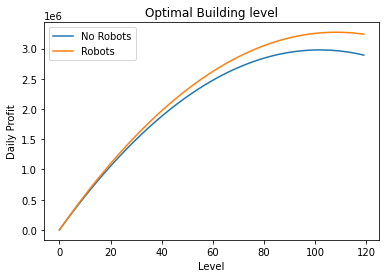

In [12]:
Bls =np.linspace(0,120,120)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Rp=Rp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Rp, In, Pu, 0.04, Pw, Sk), label = 'No Robots')
plt.plot(P(Bls, Rp, In, Pu, 0.07, Pw, Sk), label = 'Robots')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();

Comparing the two previous graphs. One when selling at 800k (assuming q4) and one when selling at 820k (assuming q5),  there's a big shift of the curve. so this product is too sensitive to the selling price and the use of robots. 

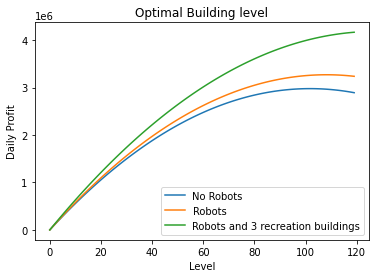

In [13]:
Bls =np.linspace(0,120,120)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Rp=Rp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Rp, In, Pu, 0.04, Pw, Sk), label = 'No Robots')
plt.plot(P(Bls, Rp, In, Pu, 0.07, Pw, Sk), label = 'Robots')
plt.plot(P(Bls, Rp, In, Pu, 0.16, Pw, Sk), label = 'Robots and 3 recreation buildings')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();